In [37]:
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import precision_score,recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import warnings

In [2]:
item = 'OFP'
package = 'Ecdat'
df = sm.datasets.get_rdataset(item, package , cache=True).data
df.head()

,ofp,ofnp,opp,opnp,emr,hosp,numchron,adldiff,age,black,sex,maried,school,faminc,employed,privins,medicaid,region,hlth
0,5,0,0,0,0,1,2,0,6.9,yes,male,yes,6,2.8810,yes,yes,no,other,other
1,1,0,2,0,2,0,2,0,7.4,no,female,yes,10,2.7478,no,yes,no,other,other
2,13,0,0,0,3,3,4,1,6.6,yes,female,no,10,0.6532,no,no,yes,other,poor
3,16,0,5,0,1,1,2,1,7.6,no,male,yes,3,0.6588,no,yes,no,other,poor
4,3,0,0,0,0,0,2,1,7.9,no,female,yes,6,0.6588,no,yes,no,other,other


In [5]:
data = df[['ofp', 'ofnp', 'opp', 'opnp', 'emr', 'hosp', 'numchron']]
data.head()

,ofp,ofnp,opp,opnp,emr,hosp,numchron
0,5,0,0,0,0,1,2
1,1,0,2,0,2,0,2
2,13,0,0,0,3,3,4
3,16,0,5,0,1,1,2
4,3,0,0,0,0,0,2


In [7]:
data.shape

(4406, 7)

In [9]:
print('Средняя: ', df['ofp'].mean())
print('Медиана: ', df['ofp'].median())
print('Скошенность: ', stats.skew(df['ofp']))
print('Эксцесс: ', stats.kurtosis(df['ofp']))

Средняя:  5.774398547435315
Медиана:  4.0
Скошенность:  3.3381744056944953
Эксцесс:  20.2064540726094


In [11]:
print('Средняя: ', df['hosp'].mean())
print('Медиана: ', df['hosp'].median())
print('Скошенность: ', stats.skew(df['hosp']))
print('Эксцесс: ', stats.kurtosis(df['hosp']))

Средняя:  0.2959600544711757
Медиана:  0.0
Скошенность:  3.9644273951861133
Эксцесс:  22.802473854151557


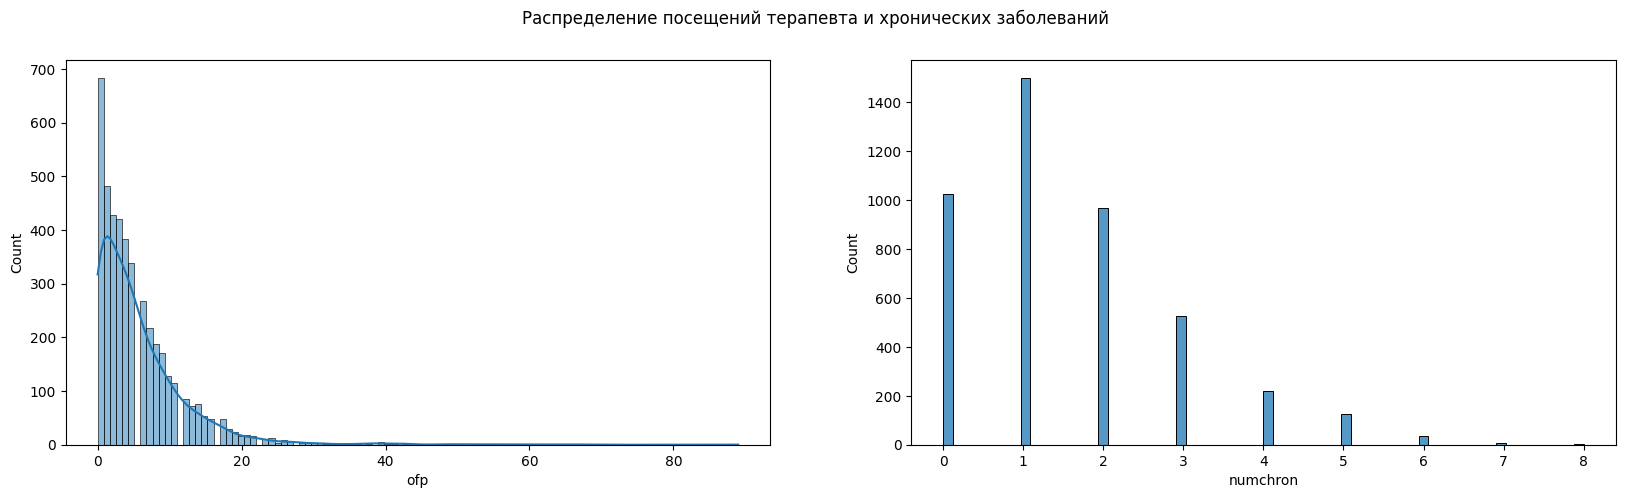

In [105]:
fig, ax  = plt.subplots(1,2, figsize = (20,5))
plt.suptitle('Распределение посещений терапевта и хронических заболеваний')
sns.histplot(df['ofp'], kde = True, ax = ax[0])
sns.histplot(df['numchron'], kde = False, ax = ax[1])
plt.show()

In [ ]:
# учитывая что исследуем такие явления как визиты к врачу и число хрон. заболеваний - правостороннее смещение вполне объяснимо

In [13]:
data.shape

(4406, 7)

In [19]:
data80 = data.head(3525)
data20 = data.tail(881)

In [221]:
print(data80.shape)
print(data20.shape)

(3525, 7)
(881, 7)


In [15]:
# отсек последние 20% сразу чтобы не показывать их моделе ни в каком виде

In [21]:
target = data80['numchron']

In [163]:
# За таргет принимаю количество хронических заболеваний "numchron". 
# Полезность: группировать пациентов по количеству хронических заболеваний.
# Для страховой компании, можно можно сформировать группы финансового риска - меньше хронических заболеваний - дешевле страховое покрытие.

In [165]:
# проверяю значимость кол-ва посещений для кол-ва хронических заболеваний через тест ANOVA

In [23]:
stats.f_oneway(target, data80['ofnp'], data80['opp'], data80['opnp'], data80['emr'], data80['hosp'])

F_onewayResult(statistic=131.54055718149667, pvalue=9.814106305035188e-138)

In [169]:
#pvalue сильно меньше 5% - значит количество хрон. заболеваний зависит от кол-ва посещений врача

In [25]:
# по сути считаю что кол-во хронических заболеваний - это качественная характеристика, несмотря на выражение в цифрах
# получается в прогнозе надо решить задачу классификации - распределить пациенктов по группам (кол-во хрон. заболеваний) в зависимости от 
# посещений врача, госпитализаций и т.д. (вот от этих метрик: ofp, ofnp, opp, opnp, emr,hosp)

In [27]:
X_train, X_test , y_train , y_test = train_test_split (data80, target, test_size = 0.2, random_state = 77)

In [29]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [31]:
y_pred

array([4, 2, 2, 5, 2, 2, 4, 3, 1, 1, 1, 1, 1, 3, 2, 0, 1, 1, 0, 3, 1, 2,
       1, 5, 0, 1, 0, 4, 4, 0, 0, 1, 2, 4, 0, 1, 2, 0, 2, 1, 3, 4, 0, 1,
       2, 1, 2, 0, 2, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 1, 1, 0, 4, 2, 2, 1,
       0, 2, 0, 2, 3, 0, 1, 4, 0, 2, 0, 4, 1, 1, 2, 3, 4, 1, 0, 1, 0, 2,
       1, 0, 2, 1, 1, 1, 0, 1, 0, 2, 2, 1, 1, 1, 4, 2, 1, 5, 1, 1, 2, 2,
       2, 0, 1, 0, 1, 0, 1, 1, 4, 0, 2, 1, 2, 1, 1, 1, 2, 1, 2, 0, 4, 3,
       1, 0, 1, 0, 0, 1, 3, 0, 0, 1, 2, 2, 3, 1, 2, 3, 2, 0, 1, 0, 2, 1,
       4, 2, 1, 1, 0, 1, 1, 1, 2, 0, 2, 0, 1, 2, 4, 2, 2, 5, 0, 1, 3, 1,
       0, 0, 4, 2, 3, 0, 5, 2, 1, 1, 0, 1, 4, 5, 1, 3, 1, 1, 4, 3, 1, 4,
       1, 3, 0, 3, 1, 0, 1, 0, 0, 1, 3, 1, 1, 1, 2, 1, 1, 3, 2, 0, 0, 1,
       3, 1, 0, 2, 2, 3, 6, 1, 0, 1, 0, 1, 3, 5, 2, 2, 3, 3, 2, 1, 1, 3,
       1, 0, 1, 1, 0, 5, 2, 1, 2, 1, 1, 4, 1, 2, 1, 0, 2, 0, 2, 1, 0, 0,
       2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 3, 5, 4, 1, 1, 0, 1,
       0, 3, 3, 1, 2, 3, 2, 1, 0, 0, 0, 0, 2, 6, 1,

In [33]:
y_test.values

array([4, 2, 2, 5, 2, 2, 4, 3, 1, 1, 1, 1, 1, 3, 2, 0, 1, 1, 0, 3, 1, 2,
       1, 5, 0, 1, 0, 4, 4, 0, 0, 1, 2, 4, 0, 1, 2, 0, 2, 1, 3, 4, 0, 1,
       2, 1, 2, 0, 2, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 1, 1, 0, 4, 2, 2, 1,
       0, 2, 0, 2, 3, 0, 1, 4, 0, 2, 0, 4, 1, 1, 2, 3, 4, 1, 0, 1, 0, 2,
       1, 0, 2, 1, 1, 1, 0, 1, 0, 2, 2, 1, 1, 1, 4, 2, 1, 5, 1, 1, 2, 2,
       2, 0, 1, 0, 1, 0, 1, 1, 4, 0, 2, 1, 2, 1, 1, 1, 2, 1, 2, 0, 4, 3,
       1, 0, 1, 0, 0, 1, 3, 0, 0, 1, 2, 2, 3, 1, 2, 3, 2, 0, 1, 0, 2, 1,
       4, 2, 1, 1, 0, 1, 1, 1, 2, 0, 2, 0, 1, 2, 4, 2, 2, 5, 0, 1, 3, 1,
       0, 0, 4, 2, 3, 0, 5, 2, 1, 1, 0, 1, 4, 5, 1, 3, 1, 1, 4, 3, 1, 4,
       1, 3, 0, 3, 1, 0, 1, 0, 0, 1, 3, 1, 1, 1, 2, 1, 1, 3, 2, 0, 0, 1,
       3, 1, 0, 2, 2, 3, 6, 1, 0, 1, 0, 1, 3, 5, 2, 2, 3, 3, 2, 1, 1, 3,
       1, 0, 1, 1, 0, 5, 2, 1, 2, 1, 1, 4, 1, 2, 1, 0, 2, 0, 2, 1, 0, 0,
       2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 3, 5, 4, 1, 1, 0, 1,
       0, 3, 3, 1, 2, 3, 2, 1, 0, 0, 0, 0, 2, 6, 1,

In [35]:
confusion_matrix(y_pred, y_test.values)

array([[157,   0,   0,   0,   0,   0,   0,   0],
       [  0, 260,   0,   0,   0,   0,   0,   0],
       [  0,   0, 149,   0,   0,   0,   0,   0],
       [  0,   0,   0,  78,   0,   0,   0,   0],
       [  0,   0,   0,   0,  34,   0,   0,   0],
       [  0,   0,   0,   0,   0,  22,   0,   0],
       [  0,   0,   0,   0,   0,   0,   3,   0],
       [  0,   0,   0,   0,   0,   0,   0,   2]], dtype=int64)

In [245]:
# идельно предсказала все группы

In [249]:
cm = confusion_matrix(y_pred, y_test.values)

In [257]:
print('Accuracy', accuracy_score(y_test.values, y_pred))
print('Precision', cm[1,1] / (cm[1,1] + cm[0,1]))

Accuracy 1.0
Precision 1.0


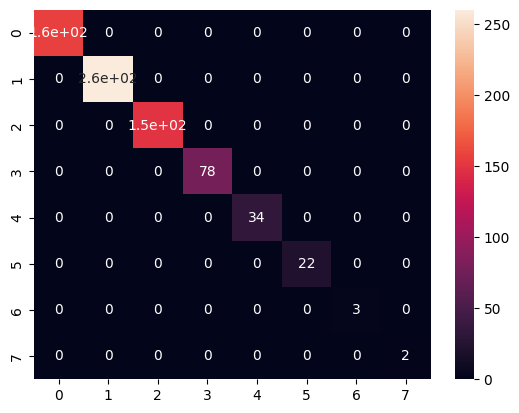

In [57]:
sns.heatmap(confusion_matrix(y_pred, y_test.values), annot = True)
plt.show()

In [247]:
#заберу на слайд

In [261]:
# теперь предскажем бинарную величину adldiff

In [59]:
data = df[['ofp', 'ofnp', 'opp', 'opnp', 'emr', 'hosp', 'numchron', 'adldiff']]
data.head()

,ofp,ofnp,opp,opnp,emr,hosp,numchron,adldiff
0,5,0,0,0,0,1,2,0
1,1,0,2,0,2,0,2,0
2,13,0,0,0,3,3,4,1
3,16,0,5,0,1,1,2,1
4,3,0,0,0,0,0,2,1


In [61]:
data80 = data.head(3525)
data20 = data.tail(881)

In [63]:
X = data80[['ofp', 'ofnp', 'opp', 'opnp', 'emr', 'hosp', 'numchron']].values
y = data80['adldiff'].values
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 77)

In [65]:
print(data80.shape)
print(data20.shape)

(3525, 8)
(881, 8)


In [67]:
target = data80['adldiff']

In [ ]:
# За таргет принимаю наличие условий, которые ограничивают повседневную активность "adldiff". 
# Полезность: выявлять людей, которым нужно скорретировать повседневную активность чтобы снижать количество визитов к врачам.
# Цель имеет очевидную социальную значимость. 
# Но, например для страховой компании, можно сформулировать и бизнес-цель - можно оплачивать людям активности (спорт) и меньше
# тратить на оплату страховых походов к врачу.

In [161]:
# проверяю значимость отличий количеств посещений врача в зависимости от условий, ограничивающих повседневную активность через тест ANOVA

In [69]:
stats.f_oneway(target, data80['ofnp'], data80['opp'], data80['opnp'], data80['emr'], data80['hosp'], data80['numchron'])

F_onewayResult(statistic=151.19939025445686, pvalue=3.3397948628709437e-189)

In [159]:
#pvalue сильно меньше 5% - значит количество посещений врача отличается в зависимости от условий, которые ограничивают повседневную активность.

In [71]:
X = data80[['ofp', 'ofnp', 'opp', 'opnp', 'emr', 'hosp', 'numchron']].values
y = data80['adldiff'].values
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 77)

In [157]:
# поделил 80/20 (из самого дата сета убрал первые 20% еще раньше). Использую ROC-AUC т.к. предсказываю бинарное значение.

In [87]:
print(X_test.shape)
print (y_test.shape)

(705, 7)
(705,)


In [89]:
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
probs= model.predict_proba(X_test)
probs = probs [:, 1]

In [91]:
auc_score = roc_auc_score(y_test, probs)
fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
auc_score

0.6889916133688376

In [93]:
print('Accuracy ', accuracy_score(y_test, pred))
print('Precision', precision_score(y_test, pred))
print('Recall   ', recall_score(y_test, pred))
print('F1       ', f1_score(y_test, pred))

Accuracy  0.8014184397163121
Precision 0.56
Recall    0.0979020979020979
F1        0.16666666666666666


In [ ]:
# как интересно при Accuracy 80% получить такой низкий Recall(((((

In [103]:
# ну не очень recall, он же тянет вниз f1. качество второй модели явно ниже первой. хотя учитывая ее цели - рекомендации
# пациентам - вполне приемлемо.

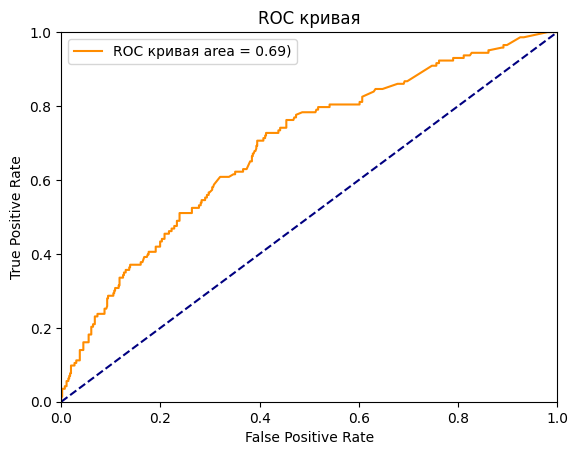

In [95]:
plt.plot(fpr, tpr, color = 'darkorange', label ='ROC кривая area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC кривая')
plt.legend()
plt.show()

In [99]:
threshold

array([       inf, 0.8216548 , 0.81827228, 0.77335295, 0.65014403,
       0.6224424 , 0.60738318, 0.5866072 , 0.57822316, 0.54959432,
       0.54043587, 0.53727682, 0.53585756, 0.53017903, 0.52239755,
       0.51621611, 0.50166703, 0.49316594, 0.47260459, 0.45469147,
       0.45166794, 0.44463043, 0.42861892, 0.41289585, 0.41047333,
       0.40733853, 0.4056414 , 0.39294972, 0.38178628, 0.37369266,
       0.36315212, 0.35828277, 0.35652915, 0.35396494, 0.34420856,
       0.3398701 , 0.33850511, 0.32529207, 0.32524208, 0.32435557,
       0.32306436, 0.32305086, 0.32203531, 0.32086737, 0.32022105,
       0.31222547, 0.31189187, 0.31182446, 0.30970914, 0.30321593,
       0.30191478, 0.29078729, 0.28703495, 0.2855118 , 0.28333145,
       0.27556848, 0.27537285, 0.27526685, 0.27299198, 0.26985885,
       0.26973099, 0.2667133 , 0.26550645, 0.26519387, 0.26356048,
       0.26047878, 0.25969611, 0.25807444, 0.25586873, 0.2545246 ,
       0.2529728 , 0.25096121, 0.25019746, 0.24908569, 0.24832

In [97]:
tpr

array([0.        , 0.00699301, 0.01398601, 0.01398601, 0.03496503,
       0.03496503, 0.04195804, 0.04195804, 0.05594406, 0.05594406,
       0.06293706, 0.06293706, 0.06993007, 0.06993007, 0.07692308,
       0.07692308, 0.0979021 , 0.0979021 , 0.1048951 , 0.1048951 ,
       0.11188811, 0.11188811, 0.13986014, 0.13986014, 0.16083916,
       0.16083916, 0.16083916, 0.16083916, 0.18181818, 0.18181818,
       0.2027972 , 0.2027972 , 0.20979021, 0.20979021, 0.23076923,
       0.23076923, 0.23776224, 0.23776224, 0.25174825, 0.25174825,
       0.25874126, 0.27272727, 0.27972028, 0.27972028, 0.28671329,
       0.28671329, 0.29370629, 0.29370629, 0.3006993 , 0.3006993 ,
       0.30769231, 0.30769231, 0.31468531, 0.31468531, 0.33566434,
       0.33566434, 0.34265734, 0.34265734, 0.34965035, 0.34965035,
       0.35664336, 0.35664336, 0.36363636, 0.36363636, 0.37062937,
       0.37062937, 0.37062937, 0.37062937, 0.37062937, 0.37062937,
       0.37762238, 0.37762238, 0.39160839, 0.39160839, 0.39860

In [101]:
fpr

array([0.        , 0.        , 0.        , 0.00177936, 0.00177936,
       0.00711744, 0.00711744, 0.01067616, 0.01067616, 0.01423488,
       0.01423488, 0.01601423, 0.01601423, 0.01779359, 0.01779359,
       0.01957295, 0.01957295, 0.02669039, 0.02669039, 0.03024911,
       0.03024911, 0.03736655, 0.03736655, 0.04448399, 0.04448399,
       0.04626335, 0.04982206, 0.05516014, 0.05516014, 0.06049822,
       0.06049822, 0.06405694, 0.06405694, 0.06761566, 0.06761566,
       0.07295374, 0.07295374, 0.08718861, 0.08718861, 0.09074733,
       0.09252669, 0.09252669, 0.09252669, 0.09430605, 0.09430605,
       0.10498221, 0.10498221, 0.10676157, 0.10676157, 0.10854093,
       0.10854093, 0.11565836, 0.11565836, 0.11743772, 0.11743772,
       0.12455516, 0.12455516, 0.12633452, 0.12633452, 0.12989324,
       0.12989324, 0.13701068, 0.13701068, 0.13879004, 0.13879004,
       0.14412811, 0.14768683, 0.15124555, 0.15658363, 0.16014235,
       0.16014235, 0.16370107, 0.16725979, 0.17259786, 0.17437

In [153]:
forecast = data20['adldiff'].values

In [155]:
forecast.shape

(881,)

In [199]:
# а это y-ки из оставшейся части выборки. к ним как раз и надо применять рекомендации о снитии ограничений на ежедневные активности